In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [54]:
insurance_dataset=pd.read_csv(r"C:\Users\rvidivada\Downloads\insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
#No of rows & columns
insurance_dataset.shape

(1338, 7)

In [56]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
#checking the missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
#Statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\rvidivada\AppData\Local\Temp\ipykernel_14040\1368846492.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


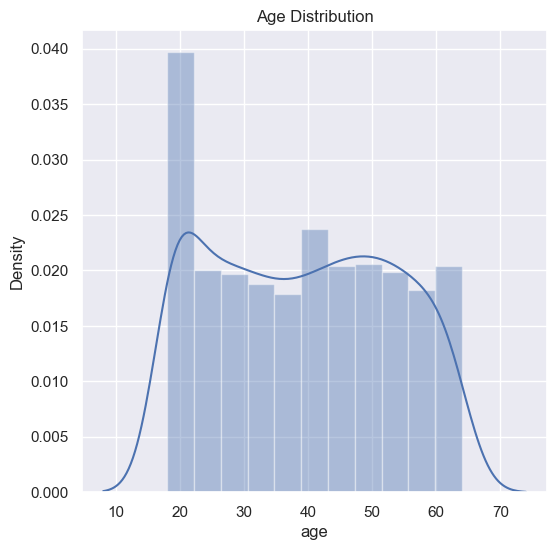

In [59]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

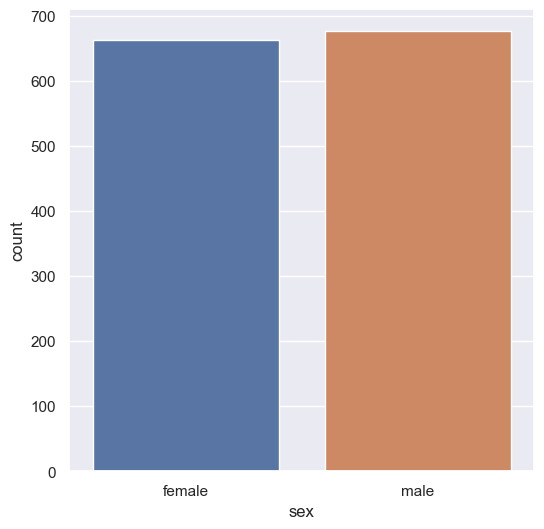

In [60]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.show()

In [61]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\rvidivada\AppData\Local\Temp\ipykernel_14040\1328292957.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


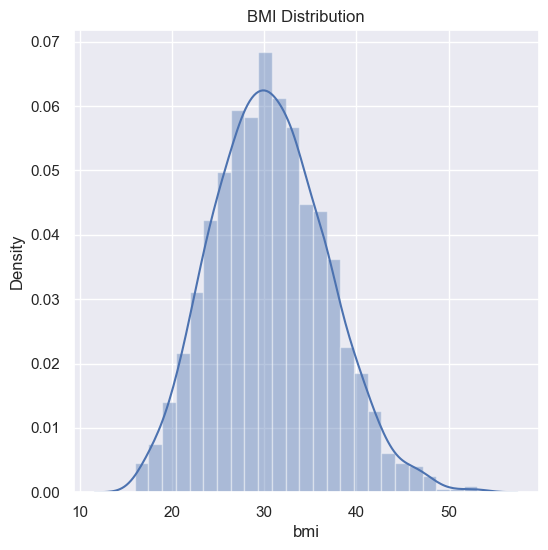

In [62]:
#BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

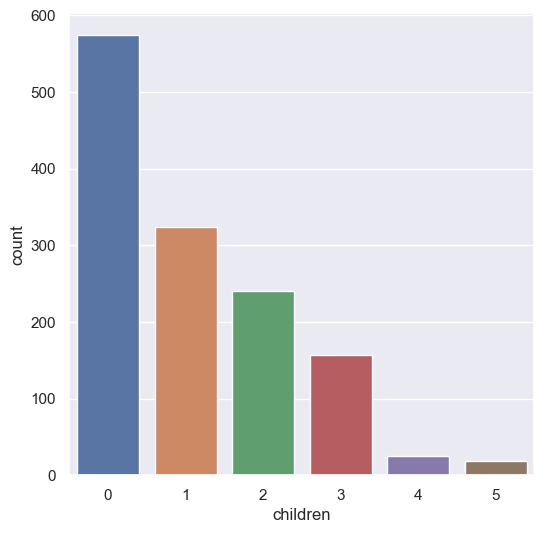

In [63]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.show()

In [64]:
set(insurance_dataset.children)

{0, 1, 2, 3, 4, 5}

In [65]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

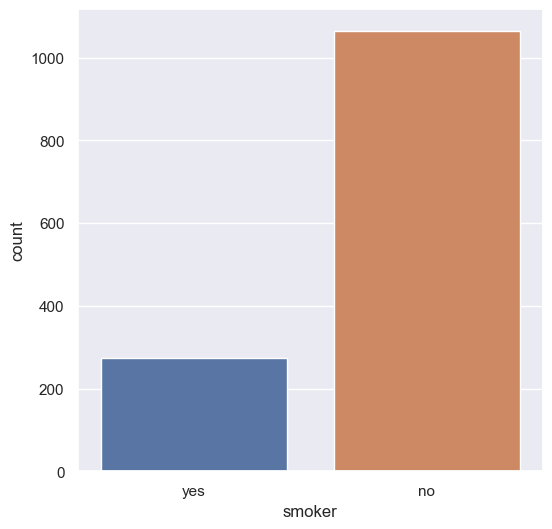

In [66]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.show()

In [67]:
insurance_dataset.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

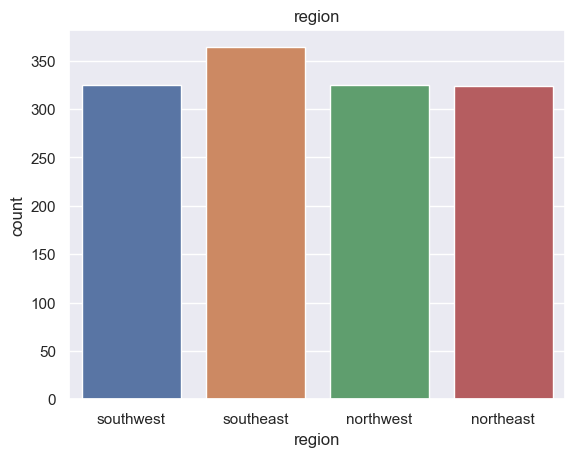

In [68]:
#Region Column
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [69]:
insurance_dataset.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\rvidivada\AppData\Local\Temp\ipykernel_14040\2635032572.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


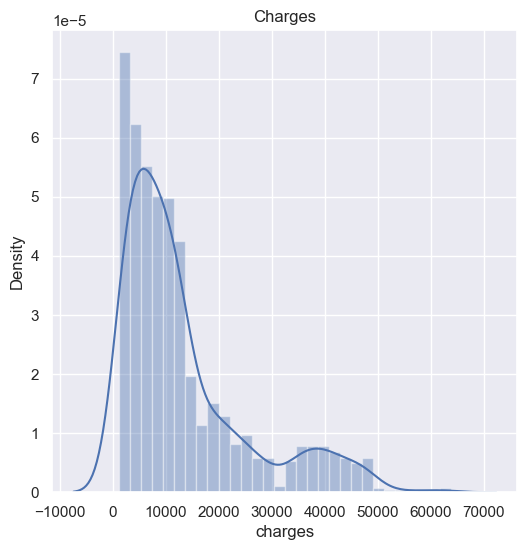

In [70]:
#Distribution of Charges Value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges')
plt.show()

In [71]:
insurance_dataset1=pd.get_dummies(insurance_dataset['sex']).astype(int)
insurance_dataset1

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [72]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [73]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [74]:
#Splitting the features
X=insurance_dataset.drop('charges', axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [75]:
Y=insurance_dataset[['charges']]
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [76]:
#splitting the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=1)
X.shape,X_train.shape,X_test.shape

((1338, 6), (1070, 6), (268, 6))

In [77]:
#Linear Regression Model Training

regressor=LinearRegression()

regressor.fit(X_train,Y_train)

LinearRegression()

In [91]:
#Model Evaluation

#Predictio on training data

from math import sqrt

training_data_prediction=regressor.predict(X_train)

mean_squared_error = metrics.mean_squared_error(Y_train,training_data_prediction)

RMSE = sqrt(mean_squared_error)

r2_train = metrics.r2_score(Y_train,training_data_prediction)

print('Mean Squared Error :', mean_squared_error)
print('Root Mean Squared Error :', RMSE)
print('R Squared Value :', r2_train.round(2))

Mean Squared Error : 36856825.51459766
Root Mean Squared Error : 6070.98225286466
R Squared Value : 0.75


In [90]:
#Prediction on testing data

testing_data_prediction = regressor.predict(X_test)

mean_squared_error_test = metrics.mean_squared_error(Y_test,testing_data_prediction)

RMSE_test = sqrt(mean_squared_error_test)

r2_test = metrics.r2_score(Y_test,testing_data_prediction)

print('Mean Squared Error :', mean_squared_error_test.round(2))
print('Root Mean Squared Error :', RMSE_test)
print('R Squared Value :',r2_test.round(2))

Mean Squared Error : 35554254.28
Root Mean Squared Error : 5962.738823418937
R Squared Value : 0.76


In [80]:
#Predicted Charges
testing_data_prediction

array([[ 4620.90467959],
       [13127.83250098],
       [12759.9818321 ],
       [13265.91226726],
       [  757.65628654],
       [32329.28549084],
       [12917.8433707 ],
       [11884.66143705],
       [ 3374.18206364],
       [29532.40525346],
       [11057.76370998],
       [17643.26013992],
       [ 8699.26424936],
       [ 8526.04855417],
       [ 3170.30642817],
       [10614.73195534],
       [ 4140.57900577],
       [ 7102.36838489],
       [15012.63802612],
       [14613.18065127],
       [12104.64774013],
       [32944.78460589],
       [ 9320.66219815],
       [ 9192.22534682],
       [ 2591.49770798],
       [ 8408.86297734],
       [ 9100.90406182],
       [10771.45401091],
       [ 7847.44549266],
       [ 3964.61152465],
       [14292.63773394],
       [ 5994.07365317],
       [34191.46769235],
       [27268.8434036 ],
       [33374.2491545 ],
       [ 9800.44644094],
       [30612.82093305],
       [26823.70919355],
       [15165.10590522],
       [34132.95824204],


In [81]:
#Predicted vs Actual Data
Y_test_flat=np.ravel(Y_test)
Y_predict_flat=np.ravel(testing_data_prediction)
df=pd.DataFrame({'Actual':Y_test_flat.round(2),'Predicted':Y_predict_flat.round(2)})
df

,Actual,Predicted
0,1646.43,4620.90
1,11353.23,13127.83
2,8798.59,12759.98
3,10381.48,13265.91
4,2103.08,757.66
...,...,...
263,40103.89,33719.58
264,42983.46,36171.44
265,44202.65,36655.51
266,2136.88,5186.15
